# Data Dojo 17 - Decision Trees

## Setup

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Hacking Order

In [13]:
np.random.seed(42)
names = ["Kerstin", "Stefan", "Anne", "Feli", "Sascha", "Mike", "Andi", "Markus"]
np.random.shuffle(names)
names = ["Simon"] + names
" => ".join(names)

'Simon => Stefan => Mike => Kerstin => Markus => Anne => Sascha => Feli => Andi'

### Data Loading

In [14]:
data = pd.read_csv("../14_trees/train.tsv", sep="\t")
test = pd.read_csv("../14_trees/test.tsv", sep="\t")

#### All cases

In [15]:
X = data.drop("species",axis=1)
y = data.species
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [16]:
X_test = test.drop("tree_id",axis=1)
tree_id = test.tree_id
pred = pd.DataFrame()
pred["tree_id"] = tree_id
pred["species"] = "unknown"

#### Only complete cases

In [17]:
X_complete = data.dropna().drop("species",axis=1)
y_complete = data.dropna().species
X_train_complete, X_val_complete, y_train_complete, y_val_complete = train_test_split(X_complete, y_complete, random_state=42)

In [18]:
X_test_complete = test.dropna().drop("tree_id",axis=1)
tree_id_complete = test.dropna().tree_id
pred_complete = pd.DataFrame()
pred_complete["tree_id"] = tree_id_complete
pred_complete["species"] = "unknown"

## Decision Trees

In [26]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train_complete, y_train_complete)

In [27]:
clf.score(X_val_complete, y_val_complete)

0.7659683188553909

[Text(0.5, 0.8333333333333334, 'X[3] <= 9.55\ngini = 0.597\nsamples = 23483\nvalue = [3900, 7028, 12555]'),
 Text(0.25, 0.5, 'X[4] <= 2.675\ngini = 0.362\nsamples = 15253\nvalue = [322, 3169, 11762]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.465\nsamples = 9073\nvalue = [239, 2840, 5994]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.126\nsamples = 6180\nvalue = [83, 329, 5768]'),
 Text(0.75, 0.5, 'X[1] <= -2.539\ngini = 0.582\nsamples = 8230\nvalue = [3578, 3859, 793]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.399\nsamples = 4668\nvalue = [688, 3524, 456]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.324\nsamples = 3562\nvalue = [2890, 335, 337]')]

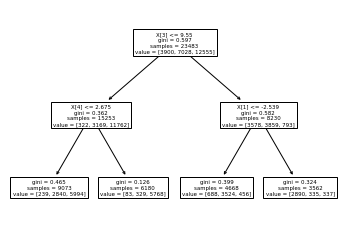

In [28]:
tree.plot_tree(clf)

In [29]:
import graphviz

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [53]:
data =[]

In [54]:
for i in range(1, 25):
    clf = tree.DecisionTreeClassifier(min_samples_leaf = i, max_depth = 10)
    clf = clf.fit(X_train_complete, y_train_complete)
    
    print(i, clf.score(X_val_complete, y_val_complete), clf.score(X_train_complete, y_train_complete))
    data.append(clf.score(X_val_complete, y_val_complete))

1 0.921691364333163 0.940212068304731
2 0.9213081246806336 0.9384661244304391
3 0.9214358712314767 0.9372737725162884
4 0.9186254471129279 0.9356555806327982
5 0.9193919264179867 0.934037388749308
6 0.9182422074603985 0.9322062768811481
7 0.9177312212570261 0.9312694289486011
8 0.9186254471129279 0.9303325810160542
9 0.9183699540112417 0.9293105650896393
10 0.9181144609095554 0.9284163011540263
11 0.9158150229943791 0.9274368692245454
12 0.9159427695452222 0.9266703572797342
13 0.916709248850281 0.9263722693011966
14 0.9188809402146142 0.9278627091938849
15 0.9183699540112417 0.9273091172337435
16 0.9177312212570261 0.926883277264404
17 0.9165815022994379 0.926074181322659
18 0.9155595298926928 0.9253502533747817
19 0.9150485436893204 0.9247114934207725
20 0.9154317833418498 0.9244985734361028
21 0.9170924885028104 0.9245411574330367
22 0.9173479816044967 0.9243708214453008
23 0.9170924885028104 0.924243069454499
24 0.9163260091977516 0.9234339735127539


In [51]:
import matplotlib.pyplot as plt

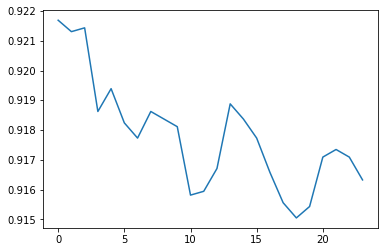

In [56]:
plt.plot(data)

## Save Test Predictions

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=13) #10 because of Markus feelings
clf = clf.fit(X_train_complete, y_train_complete)

In [43]:
pred_complete["species"] = clf.predict(X_test_complete)
pred.to_csv("my_prediction.tsv", sep="\t")

In [44]:
np.unique(pred_complete["species"])

array(['Fagus sylvatica', 'Pinus pinaster', 'Quercus ilex'], dtype=object)

In [45]:
pred_complete.to_csv("Tree_depth13.tsv", sep="\t")